### 以下代码使用svm模型训练 
- 使用了 RBF、Linear、Sigmoid 三种不同的kernel 
- 使用cross validation方法为RBF Sigmoid选择合适的参数

In [14]:
import pandas as pd
import numpy as np

path = "/Users/wangxiaoxuan/Desktop/mining_project/UCI_HAR_Dataset"

# Function to load the inertial signals
def load_inertial_signals(folder, subset):
    signals = []
    signal_names = ['body_acc_x', 'body_acc_y', 'body_acc_z', 'body_gyro_x', 'body_gyro_y', 'body_gyro_z', 'total_acc_x', 'total_acc_y', 'total_acc_z']
    
    for signal in signal_names:
        filename = path + f'/{subset}/Inertial_Signals/{signal}_{subset}.txt'
        signal_data = pd.read_csv(filename, sep=r'\s+', header=None)
        signals.append(signal_data.values)
    
    # Transpose is necessary to change the shape from (signal, sample, feature) to (sample, signal, feature)
    return np.transpose(signals, (1, 2, 0))

# Load the labels and features
def load_labels_and_features(subset):
    # Load the activity labels
    y = pd.read_csv(path + f'/{subset}/y_{subset}.txt', sep=r'\s+', header=None, names=['activity'])

    # Load the subject who performed the activity
    subject = pd.read_csv(path + f'/{subset}/subject_{subset}.txt', sep=r'\s+', header=None, names=['subject'])

    # Load the feature data
    X = pd.read_csv(path +  f'/{subset}/X_{subset}.txt', sep=r'\s+', header=None)

    # Load the feature names
    features = pd.read_csv(path + '/features.txt', sep=r'\s+', header=None, usecols=[1], names=['feature_names'])
    
    # Name the feature columns
    X.columns = features['feature_names']
    
    return X, y, subject

# Load train data
X_train, y_train, subject_train = load_labels_and_features('train')
inertial_signals_train = load_inertial_signals('train', 'train')

# Load test data
X_test, y_test, subject_test = load_labels_and_features('test')
inertial_signals_test = load_inertial_signals('test', 'test')

# Now the train and test datasets along with the inertial signals
X_train, y_train, subject_train, inertial_signals_train
# X_test, y_test, subject_test, inertial_signals_test

(feature_names  tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
 0                       0.288585          -0.020294          -0.132905   
 1                       0.278419          -0.016411          -0.123520   
 2                       0.279653          -0.019467          -0.113462   
 3                       0.279174          -0.026201          -0.123283   
 4                       0.276629          -0.016570          -0.115362   
 ...                          ...                ...                ...   
 7347                    0.299665          -0.057193          -0.181233   
 7348                    0.273853          -0.007749          -0.147468   
 7349                    0.273387          -0.017011          -0.045022   
 7350                    0.289654          -0.018843          -0.158281   
 7351                    0.351503          -0.012423          -0.203867   
 
 feature_names  tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  \
 0                     -0.

In [15]:
n_train_samples, _, _ = inertial_signals_train.shape
n_test_samples, _, _ = inertial_signals_test.shape

# Reshape the data for training and testing
X_train_signals = inertial_signals_train.reshape((n_train_samples, -1))
X_test_signals = inertial_signals_test.reshape((n_test_samples, -1))

# Combine the feature data and inertial signals data for training and testing
X_train_combined = np.hstack((X_train, X_train_signals))
X_test_combined = np.hstack((X_test, X_test_signals))

### 原始数据进行训练

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Flatten the inertial signals data for use with SVM
# SVM expects 2D array as input, so we should reshape the 3D inertial signals array into a 2D array
n_train_samples, _, _ = inertial_signals_train.shape
n_test_samples, _, _ = inertial_signals_test.shape

# Reshape the data for training and testing
X_train_signals = inertial_signals_train.reshape((n_train_samples, -1))
X_test_signals = inertial_signals_test.reshape((n_test_samples, -1))

# Combine the feature data and inertial signals data for training and testing
X_train_combined = np.hstack((X_train, X_train_signals))
X_test_combined = np.hstack((X_test, X_test_signals))

# The labels for training and testing
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Initialize the SVM classifier with a radial basis function (RBF) kernel
svm_clf = SVC(kernel='rbf')

# Fit the classifier to the training data
svm_clf.fit(X_train, y_train)

# Predict the labels on the test set
y_pred = svm_clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 95.05%


### 特征提取后的数据进行训练

In [17]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def data_load():
  train = np.loadtxt('/Users/wangxiaoxuan/Desktop/attribute_selection/attribute_selection_LinearSVC_x_train.txt', delimiter=None)
  test = np.loadtxt("/Users/wangxiaoxuan/Desktop/attribute_selection/attribute_selection_LinearSVC_x_test.txt", delimiter=None)
  return train, test

arrt_x_train, arrt_x_test = data_load()

### RBF

### linear

In [10]:
# Initialize the SVM classifier with a radial basis function (RBF) kernel
svm_clf = SVC(kernel='linear')

# Fit the classifier to the training data
svm_clf.fit(arrt_x_train, y_train)

# Predict the labels on the test set
y_pred = svm_clf.predict(arrt_x_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 96.06%


### rbf

In [13]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Example values for C
    'gamma': [1, 0.1, 0.01, 0.001],  # Example values for gamma
}
# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform the grid search on the combined training data
grid_search.fit(X_train_combined, y_train)
# Print the best parameters and the best score
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_ * 100:.2f}%')

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/wangxiaoxuan/anaconda3/envs/ml_py3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wangxiaoxuan/anaconda3/envs/ml_py3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wangxiaoxuan/anaconda3/envs/ml_py3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/wangxiaoxuan/anaconda3/envs/ml_py3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:1300: DataConve

Best parameters found: {'C': 100, 'gamma': 0.001}
Best cross-validation score: 93.89%


In [7]:
# Initialize the SVM classifier with the best parameters
best_svm_clf = grid_search.best_estimator_

# Predict the labels on the test set using the classifier with the best found parameters
y_pred = best_svm_clf.predict(arrt_x_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy with best hyperparameters: {accuracy * 100:.2f}%')

Test Accuracy with best hyperparameters: 96.50%


In [ ]:
# Initialize the SVM classifier with a radial basis function (RBF) kernel
svm_clf = SVC(kernel='rbf')

# Fit the classifier to the training data
svm_clf.fit(arrt_x_train, y_train)

# Predict the labels on the test set
y_pred = svm_clf.predict(arrt_x_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

### sigmoid

In [18]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(kernel='sigmoid'), param_grid, cv=5, scoring='accuracy', verbose=1)

# Perform the grid search on the combined training data
grid_search.fit(arrt_x_train, y_train)
# Print the best parameters and the best score
print(f'Best parameters found: {grid_search.best_params_}')
print(f'Best cross-validation score: {grid_search.best_score_ * 100:.2f}%')

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'C': 10, 'gamma': 0.001}
Best cross-validation score: 94.61%


In [9]:
# Initialize the SVM classifier with the best parameters
best_svm_clf = grid_search.best_estimator_

# Predict the labels on the test set using the classifier with the best found parameters
y_pred = best_svm_clf.predict(arrt_x_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy with best hyperparameters: {accuracy * 100:.2f}%')

Test Accuracy with best hyperparameters: 95.32%


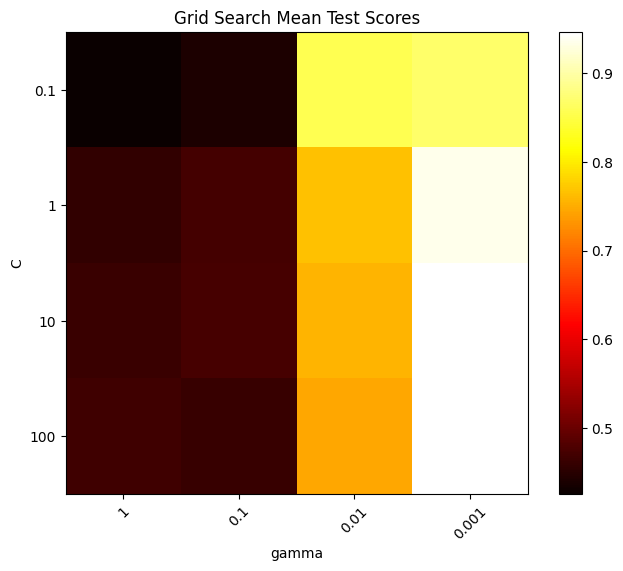

In [20]:
import matplotlib.pyplot as plt
# Get the mean test scores from the grid search
mean_test_scores = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['C']), len(param_grid['gamma']))

# Plot the scores as a heat map
plt.figure(figsize=(8, 6))
plt.imshow(mean_test_scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.title('Grid Search Mean Test Scores')
plt.show()